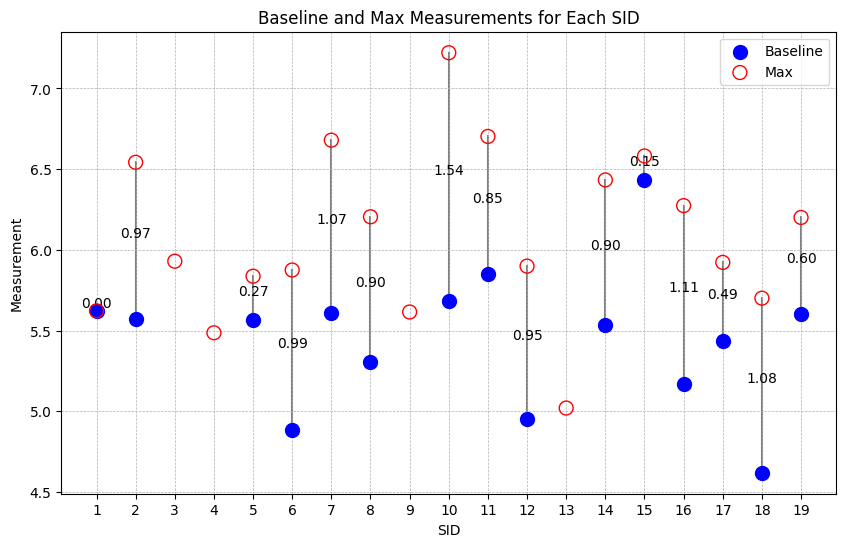

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
# Provided data
data = {
    "SID": range(1, 20),
    "Baseline": [5.621782752, 5.568778042, None, None, 5.562744548, 4.88501557, 5.609744451, 
                 5.306995802, None, 5.681352663, 5.852106684, 4.951752436, None, 5.535537221, 
                 6.42961825, 5.168017845, 5.433778811, 4.618981569, 5.604371109],
    "Max": [5.621799224, 6.542215743, 5.929373961, 5.485857654, 5.836465903, 5.874936169, 
            6.679238874, 6.204660343, 5.614711653, 7.221070213, 6.702560805, 5.898852381, 
            5.019797328, 6.432898772, 6.581430788, 6.273776982, 5.92216056, 5.700399085, 
            6.200373278]
}

df_plot = pd.DataFrame(data)

# Create the plot
plt.figure(figsize=(10, 6))

# Plot Baseline and Max points
for _, row in df_plot.iterrows():
    if pd.notnull(row['Baseline']):
        plt.scatter(row['SID'], row['Baseline'], color='blue', label='Baseline', s=100, zorder=5)
    plt.scatter(row['SID'], row['Max'], facecolors='none', edgecolors='red', label='Max', s=100, zorder=5)
    
    # Draw line and label if both Baseline and Max are present
    if pd.notnull(row['Baseline']):
        plt.plot([row['SID'], row['SID']], [row['Baseline'], row['Max']], color='grey', zorder=1)
        distance = row['Max'] - row['Baseline']
        plt.text(row['SID'], (row['Baseline'] + row['Max']) / 2, f"{distance:.2f}", 
                 ha='center', va='bottom', color='black')

plt.xlabel('SID')
plt.ylabel('Measurement')
plt.title('Baseline and Max Measurements for Each SID')
plt.xticks(range(1, 20))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # Remove duplicates
plt.legend(by_label.values(), by_label.keys())

plt.show()
